In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
    })

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,55.653434,14.048762,13.250108,8.471326,22.098581
1,59.311322,52.055855,11.643497,22.878392,19.479885
2,53.312423,0.126334,8.943533,2.509256,18.001077
3,40.149993,0.558892,12.116924,0.252787,20.111686
4,57.595509,7.878563,10.365846,15.403478,16.680071


<AxesSubplot: ylabel='Density'>

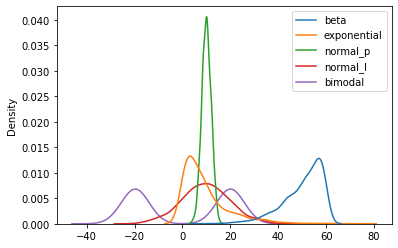

In [6]:
sns.kdeplot(data=df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.326858,9.388270,10.049726,9.740965,0.117917
std,8.315866,9.771612,1.943283,9.976327,20.135938
min,9.755291,0.001371,3.983029,-20.976269,-30.960071
25%,45.611093,2.515010,8.711722,2.979386,-19.686548
50%,52.404651,6.425350,10.010626,9.787799,-0.992875
75%,56.850583,12.405591,11.348607,16.432735,20.008128
max,59.985876,73.558611,15.782411,42.148281,28.709592


<AxesSubplot: ylabel='Density'>

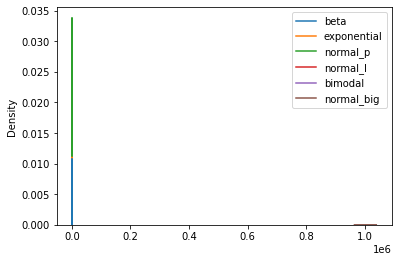

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot: >

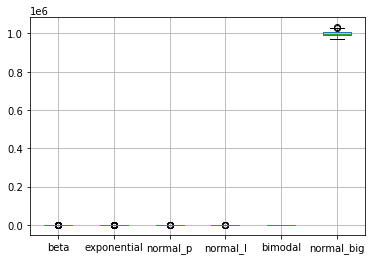

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.640852,0.477181,1.647719,-0.127329,1.092160,0.482720
1,1.080941,4.368668,0.820554,1.317519,0.962044,1.497245
2,0.359200,-0.948315,-0.569524,-0.725250,0.888566,-0.337858
3,-1.224401,-0.904026,1.064298,-0.951545,0.993436,-0.364994
4,0.874508,-0.154577,0.162754,0.567879,0.822929,-1.035727


<AxesSubplot: ylabel='Density'>

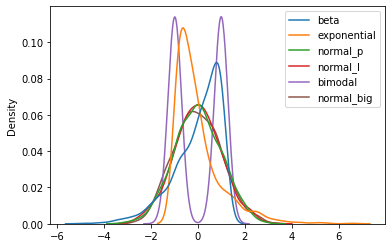

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.131628e-16,7.460699e-17,7.167600e-16,5.684342e-17,-1.136868e-16,4.344969e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.881256e+00,-9.611102e-01,-3.123443e+00,-3.080553e+00,-1.544181e+00,-2.709100e+00
25%,-5.673643e-01,-7.037426e-01,-6.888719e-01,-6.781015e-01,-9.840304e-01,-7.039268e-01
50%,2.499839e-01,-3.033689e-01,-2.013051e-02,4.696822e-03,-5.519225e-02,-2.319444e-02
75%,7.848839e-01,3.089389e-01,6.687296e-01,6.711006e-01,9.882909e-01,7.005002e-01
max,1.162098e+00,6.570302e+00,2.951476e+00,3.250047e+00,1.420643e+00,3.217212e+00


<AxesSubplot: >

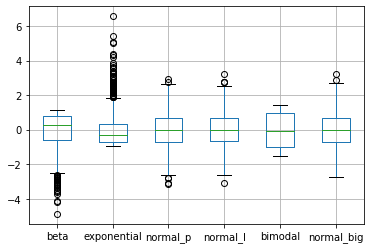

In [15]:
df_s.boxplot()